# Run calculations

In [5]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout = 900)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 6/6 [15:01<00:00, 150.17s/it]  


# Organise results into dictionaries

In [1]:
import re
import glob

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def getLatticeEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])

def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies
        
def latticeEnergy(data):
    lattice_energy = getLatticeEnergy(data)
    return lattice_energy

energies = energyList('*.out')
lattice_energy = latticeEnergy('na3ocl_na_vac.out')

na2o = latticeEnergy('ana2o.out') #lattice parameter fromm chemtube3d.com (fluorite)
nacl = latticeEnergy('anacl.out') #lattice parameter from worksheet (rocksalt)
mgo = latticeEnergy('amgo.out') #lattice parameter from crystec.de (rocksalt)
mgcl2 = latticeEnergy('amgcl2.out') #lattice parameter from materialsproject.org
cao = latticeEnergy('acao.out') #lattice parameter from ucl.ac.uk (rocksalt)
cacl2 = latticeEnergy('acacl2.out') / 2 #lattice parameter from materialsproject.org
sro = latticeEnergy('asro.out') #lattice parameter from ucl.ac.uk (rocksalt)
srcl2 = latticeEnergy('asrcl2.out') #lattice parameter from materialsproject.org (fluorite)
bao = latticeEnergy('abao.out') #lattice parameter from ucl.ac.uk (rocksalt)
bacl2 = latticeEnergy('abacl2.out') #lattice parameter from materialsproject.org (fluorite)
alcl3 = latticeEnergy('aalcl3.out') / 2 #lattice parameter from materialsproject.org (fluorite)
gacl3 = latticeEnergy('agacl3.out') / 2 #lattice parameter from materialsproject.org (fluorite)

magic = open('/home/ben/Documents/na3ocl_project/gulp_calcs/files/output_na3ocl_khandy.txt', 'w+')

magic.write("Calculations on Na3OCl anti-perovskite:")
magic.write("\n")
magic.write("***************************************")
magic.write("\n")
magic.write("\n")
magic.write("Na vacancy defect energy: " + str(round(energies['na3ocl_na_vac.out'], 2)) + " eV" + "\n")
magic.write("Na vacancy migration barrier: " + str(round((energies['na3ocl_na_vmig.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("Na interstitial defect energy: " + str(round(energies['na3ocl_na_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("O vacancy defect energy: " + str(round(energies['na3ocl_o_vac.out'], 2)) + " eV" + "\n")
magic.write("O vacancy migration barrier: " + str(round((energies['na3ocl_o_vmig.out'] - energies['na3ocl_o_vac.out']), 2)) + " eV" + "\n")
magic.write("O interstitial defect energy: " + str(round(energies['na3ocl_o_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Cl vacancy defect energy: " + str(round(energies['na3ocl_cl_vac.out'], 2)) + " eV" + "\n")
magic.write("Cl vacancy migration barrier: " + str(round((energies['na3ocl_cl_vmig.out'] - energies['na3ocl_cl_vac.out']), 2)) + " eV" + "\n")
magic.write("Cl interstitial defect energy: " + str(round(energies['na3ocl_cl_int.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Mg impurity on Na defect energy: " + str(round(energies['na3ocl_mg_dop.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity on Na defect energy: " + str(round(energies['na3ocl_ca_dop.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity on Na defect energy: " + str(round(energies['na3ocl_sr_dop.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity on Na defect energy: " + str(round(energies['na3ocl_ba_dop.out'], 2)) + " eV" + "\n")
magic.write("Al impurity on Na defect energy: " + str(round(energies['na3ocl_al_dop.out'], 2)) + " eV" + "\n")
magic.write("Ga impurity on Na defect energy: " + str(round(energies['na3ocl_ga_dop.out'], 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Cl vacancy and Na vacancy energy: " + str(round(energies['na3ocl_vcl_clu.out'], 2)) + " eV" + "\n")
magic.write("Mg impurity and Na vacancy energy: " + str(round(energies['na3ocl_mg_clu.out'], 2)) + " eV" + "\n")
magic.write("Ca impurity and Na vacancy energy: " + str(round(energies['na3ocl_ca_clu.out'], 2)) + " eV" + "\n")
magic.write("Sr impurity and Na vacancy energy: " + str(round(energies['na3ocl_sr_clu.out'], 2)) + " eV" + "\n")
magic.write("Ba impurity and Na vacancy energy: " + str(round(energies['na3ocl_ba_clu.out'], 2)) + " eV" + "\n")
magic.write("Al impurity and Na vacancy energy: " + str(round(energies['na3ocl_al_clu.out'], 2)) + " eV" + "\n")
magic.write("Ga impurity and Na vacancy energy: " + str(round(energies['na3ocl_ga_clu.out'], 2)) + " eV" + "\n")
magic.write("\n")

#magic.write("Mg impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_mg_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("Ca impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_ca_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("Sr impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_sr_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("Ba impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_ba_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("Al impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_al_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("Ga impurity and Na vacancy energy (opp): " + str(round(energies['na3ocl_ga_clu_opp.out'], 2)) + " eV" + "\n")
#magic.write("\n")

magic.write("Na3OCl Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 3 + energies['na3ocl_o_vac.out'] + energies['na3ocl_cl_vac.out'] + lattice_energy), 2)) + " eV" + "\n")
magic.write("NaCl partial Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_cl_vac.out'] + nacl), 2)) + " eV" + "\n")
magic.write("Na2O partial Schottky defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_o_vac.out'] + na2o), 2)) + " eV" + "\n")
magic.write("Na Frenkel defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_na_int.out']), 2)) + " eV" + "\n")
magic.write("O Frenkel defect energy: " + str(round((energies['na3ocl_o_vac.out'] + energies['na3ocl_o_int.out']), 2)) + " eV" + "\n")
magic.write("Cl Frenkel defect energy: " + str(round((energies['na3ocl_cl_vac.out'] + energies['na3ocl_cl_int.out']), 2)) + " eV" + "\n")
magic.write("\n")
magic.write("Cl vancancy and Na vacancy clustering energy: " + str(round((energies['na3ocl_vcl_clu.out'] - energies['na3ocl_cl_vac.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("MgCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_mg_dop.out'] + nacl * 2 - mgcl2), 2)) + " eV" + "\n")
magic.write("MgO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_mg_dop.out'] + na2o - mgo), 2)) + " eV" + "\n")
magic.write("Mg impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_mg_clu.out'] - energies['na3ocl_mg_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("CaCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ca_dop.out'] + nacl * 2 - cacl2), 2)) + " eV" + "\n")
magic.write("CaO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ca_dop.out'] + na2o - cao), 2)) + " eV" + "\n")
magic.write("Ca impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_ca_clu.out'] - energies['na3ocl_ca_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("SrCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_sr_dop.out'] + nacl * 2 - srcl2), 2)) + " eV" + "\n")
magic.write("SrO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_sr_dop.out'] + na2o - sro), 2)) + " eV" + "\n")
magic.write("Sr impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_sr_clu.out'] - energies['na3ocl_sr_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("BaCl2 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ba_dop.out'] + nacl * 2 - bacl2), 2)) + " eV" + "\n")
magic.write("BaO on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] + energies['na3ocl_ba_dop.out'] + na2o - bao), 2)) + " eV" + "\n")
magic.write("Ba impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_ba_clu.out'] - energies['na3ocl_ba_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("AlCl3 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_al_dop.out'] + nacl * 3 - alcl3), 2)) + " eV" + "\n")
magic.write("Al impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_al_clu.out'] - energies['na3ocl_al_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("GaCl3 on Na doping defect energy: " + str(round((energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_ga_dop.out'] + nacl * 3 - gacl3), 2)) + " eV" + "\n")
magic.write("Ga impurity and Na vacancy clustering energy: " + str(round((energies['na3ocl_ga_clu.out'] - energies['na3ocl_ga_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
magic.write("\n")

#magic.write("Mg impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_mg_clu_opp.out'] - energies['na3ocl_mg_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("Ca impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_ca_clu_opp.out'] - energies['na3ocl_ca_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("Sr impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_sr_clu_opp.out'] - energies['na3ocl_sr_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("Ba impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_ba_clu_opp.out'] - energies['na3ocl_ba_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("Al impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_al_clu_opp.out'] - energies['na3ocl_al_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("Ga impurity and Na vacancy clustering energy (opp): " + str(round((energies['na3ocl_ga_clu_opp.out'] - energies['na3ocl_ga_dop.out'] - energies['na3ocl_na_vac.out']), 2)) + " eV" + "\n")
#magic.write("\n")

magic.write("Lattice energy of Na3OCl (from calculations): " + str(round(lattice_energy, 2)) + " eV" + "\n")
magic.write("Lattice energy of NaCl (from calculations): " + str(round(nacl, 2)) + " eV" + "\n")
magic.write("Lattice energy of Na2O (from calculations): " + str(round(na2o, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgO (from calculations): " + str(round(mgo, 2)) + " eV" + "\n")
magic.write("Lattice energy of MgCl2 (from calculations): " + str(round(mgcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaO (from calculations): " + str(round(cao, 2)) + " eV" + "\n")
magic.write("Lattice energy of CaCl2 (from calculations): " + str(round(cacl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrO (from calculations): " + str(round(sro, 2)) + " eV" + "\n")
magic.write("Lattice energy of SrCl2 (from calculations): " + str(round(srcl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaO (from calculations): " + str(round(bao, 2)) + " eV" + "\n")
magic.write("Lattice energy of BaCl2 (from calculations): " + str(round(bacl2, 2)) + " eV" + "\n")
magic.write("Lattice energy of AlCl3 (from calculations): " + str(round(alcl3, 2)) + " eV" + "\n")
magic.write("Lattice energy of GaCl3 (from calculations): " + str(round(gacl3, 2)) + " eV" + "\n")

magic.close()

# Create migration profiles

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import re
import glob
import numpy as np

sf = 0.157

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

ions = ['na', 'cl', 'o']
energies = {}

for n in ions:
    energy = energyList(f'./migrations/{n}mig/*.out')
    energies[n] = []
    for i in range(0, 51):
        try:
            energies[n].append(energy[f'./migrations/{n}mig/{i}.out'] - energy[f'./migrations/{n}mig/0.out'])
        except:
            raise

x = np.linspace(0,5, 51)

fig, ax = plt.subplots()

ax.plot(x, energies['na'], color='orange')
ax.plot(x, energies['cl'], color='green')
ax.plot(x, energies['o'], color='red')
plt.xlabel('Migration coordinate')
plt.ylabel('Relative energy, eV')
plt.legend(labels=['Na', 'Cl', 'O'])
plt.yticks(np.arange(0, 6), np.arange(0, 6))
plt.title('Vacancy migration using new potentials \n with defect centre fixed at migration centre (w/ shells)')

cell = patches.Rectangle((0.2, 3.5), 1.2, 1.2, fc='white', ec='black')
na1 = patches.Circle((0.2, 4.1), 1.16*sf, facecolor='orange', edgecolor='black')
na2 = patches.Circle((0.8, 3.5), 1.16*sf, facecolor='orange', edgecolor='black')
na3 = patches.Circle((0.8, 4.7), 1.16*sf, facecolor='orange', edgecolor='black')
na4 = patches.Circle((1.4, 4.1), 1.16*sf, facecolor='orange', edgecolor='black')
o1 = patches.Circle((0.44, 3.74), 1.21*sf, facecolor='red', edgecolor='black')
o2 = patches.Circle((0.2, 4.7), 1.21*sf, facecolor='red', edgecolor='black')
o3 = patches.Circle((1.4, 3.5), 1.21*sf, facecolor='red', edgecolor='black')
cl = patches.Circle((0.8, 4.1), 1.67*sf, facecolor='green', edgecolor='black')
circle = patches.Circle((0.95, (energy['./migrations/omig/10.out'] - energy['./migrations/omig/0.out'])), 0.2, facecolor='white', edgecolor='black')
arrow = patches.Arrow(0.3, 3.6, 1.0, 1.0, width=0.3, color='black', joinstyle='round')
arrow2 = patches.FancyArrow(0.9, 2.15, 0, 0.8, color='black', width=0.001, head_width=0.1)

ax.add_patch(cell)
ax.add_patch(cl)
ax.add_patch(na1)
ax.add_patch(na2)
ax.add_patch(na3)
ax.add_patch(na4)
ax.add_patch(arrow)
ax.add_patch(o1)
ax.add_patch(o2)
ax.add_patch(o3)
ax.add_patch(circle)
ax.add_patch(arrow2)

ax.set_xlim(-0.2, 5.2)
ax.set_ylim(-0.2, 5.2)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.gca().set_aspect('equal', adjustable='box')

plt.savefig('/home/ben/Documents/na3ocl project/outcomes/khandy_migration_fixcent.jpg', bbox_inches='tight', dpi=1080)

# Defect energies

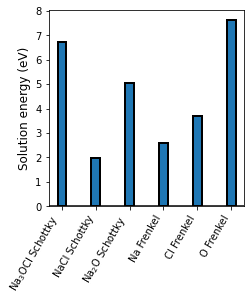

In [2]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Na$_\mathrm{3}$OCl Schottky', 'NaCl Schottky', 'Na$_\mathrm{2}$O Schottky', 'Na Frenkel', 'Cl Frenkel', 'O Frenkel']

calculations = [(energies['na3ocl_na_vac.out'] * 3 + energies['na3ocl_o_vac.out'] + energies['na3ocl_cl_vac.out'] + lattice_energy), 
                (energies['na3ocl_na_vac.out'] + energies['na3ocl_cl_vac.out'] + nacl), 
                (energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_o_vac.out'] + na2o),
                (energies['na3ocl_na_vac.out'] + energies['na3ocl_na_int.out']), 
                (energies['na3ocl_cl_vac.out'] + energies['na3ocl_cl_int.out']),
                (energies['na3ocl_o_vac.out'] + energies['na3ocl_o_int.out']),]
dawson2018 = [2.45, 6.10, 1.75, 0]
wan2015 = [1.94, 0, 1.28, 2.52]

fig,ax = plt.subplots()

plt.bar(np.arange(len(calculations)), calculations, color='tab:blue', width=0.25, edgecolor='black', linewidth=2)
plt.xticks(np.arange(len(labels)), labels)
fig.autofmt_xdate(rotation=60)
plt.ylabel('Solution energy (eV)', size=12)
plt.axhline(0, color='black', linewidth = 1.5)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('/home/ben/Documents/na3ocl_project/gulp_calcs/files/defects.jpg', bbox_inches='tight', dpi=500)

# Doping energies

al added
ga added
[-1.0091452600000004, -1.274843360000002, 0.48430789000000374, 1.5962104499999974, -1.5196227650000012, -2.6180421599999946]


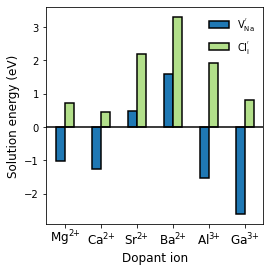

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
col = cmx.get_cmap('Paired')

fig, ax = plt.subplots()

metals = ['mg', 'ca', 'sr', 'ba', 'al', 'ga']

labels = ['Mg$^\mathrm{2\!\!+}$', 'Ca$^\mathrm{2\!\!+}$', 'Sr$^\mathrm{2\!\!+}$', 'Ba$^\mathrm{2\!\!+}$', 'Al$^\mathrm{3\!\!+}$', 'Ga$^\mathrm{3\!\!+}$']
na_vac_energies = []
cl_int_energies = []
experimental = [1.93, 1.56, 1.28, 0.77]

for i in metals:
    if i == 'al' or i == 'ga':
        mcl3 = latticeEnergy('a' + i + 'cl3.out')/2
        na_vac_energies.append(energies['na3ocl_na_vac.out'] * 2 + energies['na3ocl_' + i + '_dop.out'] + nacl * 3 - mcl3)
        print(i + ' added')
        continue
    else:
        mcl2 = latticeEnergy('a' + i + 'cl2.out')
        if i == 'ca':
            mcl2 = mcl2 / 2
        na_vac_energies.append(energies['na3ocl_na_vac.out'] + energies['na3ocl_' + i + '_dop.out'] + nacl * 2 - mcl2)

print(na_vac_energies)
    
for i in metals:
    if i == 'al' or i == 'ga':
        mcl3 = latticeEnergy('a' + i + 'cl3.out')/2
        cl_int_energies.append(energies['na3ocl_cl_int.out'] * 2 + energies['na3ocl_' + i + '_dop.out'] + nacl - mcl3)
        continue
    else:
        mcl2 = latticeEnergy('a' + i + 'cl2.out')
        if i == 'ca':
            mcl2 = mcl2 / 2
        cl_int_energies.append(energies['na3ocl_cl_int.out'] + energies['na3ocl_' + i + '_dop.out'] + nacl - mcl2)
    
ax.bar(np.arange(len(metals))-0.125, na_vac_energies, color=col(1), edgecolor='black', width=0.25, linewidth=1.5)
ax.bar(np.arange(len(metals))+0.125, cl_int_energies, color=col(2), edgecolor='black', width=0.25, linewidth=1.5)
plt.xticks(np.arange(len(metals)), labels, size=12, va = 'bottom', y = -0.077)
plt.xlabel('Dopant ion', size=12)
plt.ylabel('Solution energy (eV)', size=12)
plt.legend(('V$_\mathrm{Na}^\mathrm{\'}$', 'Cl$_\mathrm{i}^\mathrm{\'}$'), frameon=False)
plt.axhline(0, color='black', linewidth = 1.5)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('/home/ben/Documents/na3ocl_project/gulp_calcs/files/doping.jpg', bbox_inches='tight', dpi=500)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ben/Documents/na3ocl project/gulp_calcs/files/doping.jpg'

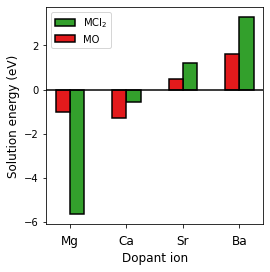

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
col = cmx.get_cmap('Paired')

fig, ax = plt.subplots()

metals = ['mg', 'ca', 'sr', 'ba']

labels = ['Mg', 'Ca', 'Sr', 'Ba']
na_vac_energies = []
cl_int_energies = []
experimental = [1.93, 1.56, 1.28, 0.77]

for i in metals:
    mcl2 = latticeEnergy('a' + i + 'cl2.out')
    if i == 'ca':
        mcl2 = mcl2 / 2
    na_vac_energies.append(energies['na3ocl_na_vac.out'] + energies['na3ocl_' + i + '_dop.out'] + nacl * 2 - mcl2)
    
for i in metals:
    mo = latticeEnergy('a' + i + 'o.out')
    cl_int_energies.append(energies['na3ocl_cl_int.out'] + energies['na3ocl_' + i + '_dop.out'] + nacl - mcl2)
    
ax.bar(np.arange(len(metals))+0.125, cl_int_energies, color=col(3), edgecolor='black', width=0.25, linewidth=1.5)
ax.bar(np.arange(len(metals))-0.125, na_vac_energies, color=col(5), edgecolor='black', width=0.25, linewidth=1.5)
plt.xticks(np.arange(len(metals)), labels, size=12, va = 'bottom', y = -0.077)
plt.xlabel('Dopant ion', size=12)
plt.ylabel('Solution energy (eV)', size=12)
plt.legend(('MCl$_\mathrm{2}$', 'MO')) 
plt.axhline(0, color='black', linewidth = 1.5)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('/home/ben/Documents/na3ocl project/gulp_calcs/files/doping.jpg', bbox_inches='tight', dpi=500)

# Clustering energies

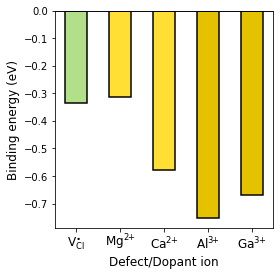

In [3]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
col = cmx.get_cmap('Paired')

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots()

metals = ['vcl', 'mg', 'ca', 'al', 'ga']
ticks = []
colors = [col(2), lighten_color('gold', 0.8), lighten_color('gold', 0.8), lighten_color('gold', 1.1), lighten_color('gold', 1.1)]

labels = [r'V$_\mathrm{Cl}^\mathrm{\bullet}$', r'$\mathrm{Mg}^\mathrm{2\!\!+}$', r'Ca$^\mathrm{2\!\!+}$', r'Al$^\mathrm{3\!\!+}$', r'Ga$^\mathrm{3\!\!+}$']
clustering_energies = []
literature = [-0.25, -0.1, -0.15, -0.42]

for i in metals:
    if i == 'vcl':
        clustering_energies.append((energies[f'na3ocl_{i}_clu.out'] - energies[f'na3ocl_cl_vac.out'] - energies['na3ocl_na_vac.out']))
        continue
    else:
        clustering_energies.append((energies[f'na3ocl_{i}_clu.out'] - energies[f'na3ocl_{i}_dop.out'] - energies['na3ocl_na_vac.out']))

ax.bar(np.arange(len(metals)), clustering_energies, align='center', color=colors, edgecolor='black', width=0.5, linewidth=1.5)
plt.xticks(np.arange(len(metals)), labels, size=12, va = 'bottom', y = -0.077)
plt.xlabel('Defect/Dopant ion', size=12)
plt.ylabel('Binding energy (eV)', size=12)
plt.axhline(0, color='black', linewidth = 1.5)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('/home/ben/Documents/na3ocl_project/gulp_calcs/files/clustering.jpg', bbox_inches='tight', dpi=500)

In [ ]:
energies